<a href="https://colab.research.google.com/github/AditMeh/deep-learning/blob/main/meta-learning/siamese_net/train_siamese_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/AditMeh/deep-learning

Cloning into 'deep-learning'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (324/324), done.
remote: Compressing objects: 100% (235/235), done.
remote: Total 324 (delta 154), reused 126 (delta 51), pack-reused 0
Receiving objects: 100% (324/324), 24.40 MiB | 26.98 MiB/s, done.
Resolving deltas: 100% (154/154), done.


In [ ]:
%%capture
%cd ./deep-learning/meta-learning/siamese_net/
!git clone https://github.com/brendenlake/omniglot
%cd omniglot/python
!unzip images_background.zip
!unzip images_evaluation.zip
%cd ../..

In [ ]:
from random import sample
from dataloader import RandomPairSampler
from torch.utils.data import DataLoader
from utils import dataset_to_dicts
from model import SiameseNet
from train import train
import torch

ds_train_structured, ds_train_unstructured = dataset_to_dicts(
    TRAIN_DATASET_PATH)
ds_val_structured, ds_val_unstructured = dataset_to_dicts(
    VALIDATION_DATASET_PATH)

train_dataset = RandomPairSampler(
    dataset=ds_train_unstructured, sample_mode="uniform", is_val=False)

val_dataset = RandomPairSampler(
    dataset=ds_val_unstructured, sample_mode="uniform", is_val=True)

train_loader = DataLoader(
    train_dataset, batch_size=32)

val_loader = DataLoader(
    val_dataset, batch_size=32)


tensor([1.])


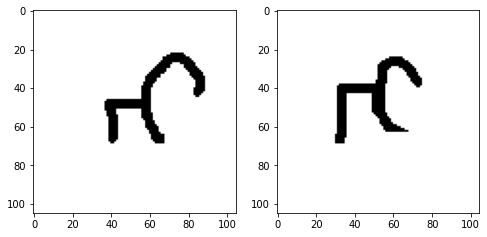

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt


x1, x2, label = next(iter(val_loader))
idx = 0


images = [torch.squeeze(x1[idx]).cpu().detach().numpy(), torch.squeeze(x2[idx]).cpu().detach().numpy()]

print(label[idx])

w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 2
rows = 1
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[i - 1], cmap='gray')
plt.show()


In [ ]:
device = (torch.device('cuda') if torch.cuda.is_available()
            else torch.device('cpu'))

print(f"Training on device {device}.")

net = SiameseNet().to(device=device)

train(net, train_loader, val_loader, samples_per_epoch=30000, samples_val=10000, n_epochs=20,
        lr=0.001, device=device, batch_size=32, save_path="blank")

Training on device cuda.
Epoch 1, Train Loss 0.5076915073076884, Val Loss 0.4841767710208893, Val Accuracy 0.7789
Epoch 2, Train Loss 0.3635839870929718, Val Loss 0.4132874802827835, Val Accuracy 0.81995
Epoch 3, Train Loss 0.2584171751777331, Val Loss 0.3496463627576828, Val Accuracy 0.8528
Epoch 4, Train Loss 0.18559684297243753, Val Loss 0.3432201575994492, Val Accuracy 0.85745
Epoch 5, Train Loss 0.12793107129534084, Val Loss 0.3457467356801033, Val Accuracy 0.8574


KeyboardInterrupt: ignored